In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import adjusted_rand_score, silhouette_score


In [2]:
# Load dataset
df = pd.read_csv("data/heart_disease_cleveland_clean.csv")   # or cleaned version
X = df.drop("target", axis=1)
y = df["target"]

# Split (we don’t need y_train here, but good for consistency)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Load preprocessor
preprocessor = joblib.load(r"C:\Users\moham\miniconda3\envs\heart_ml\models\final_pipeline.pkl")

# Transform data (fit only on train, transform both)
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

# For clustering we usually use all data
X_all_trans = preprocessor.fit_transform(X)


c:\Users\moham\miniconda3\envs\heart_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\moham\miniconda3\envs\heart_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\moham\miniconda3\envs\heart_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\moham\miniconda3\envs\heart_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: 

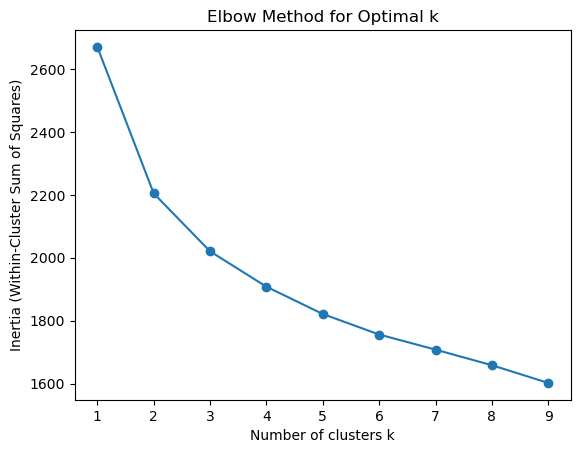

In [3]:
inertias = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_all_trans)
    inertias.append(km.inertia_)

plt.plot(K, inertias, marker="o")
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [4]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_all_trans)

print("Adjusted Rand Index (ARI):", adjusted_rand_score(y, labels))
print("Silhouette Score:", silhouette_score(X_all_trans, labels))

pd.crosstab(y, labels, rownames=["True"], colnames=["Cluster"])


Adjusted Rand Index (ARI): 0.2628978467816707
Silhouette Score: 0.1638689154925163


c:\Users\moham\miniconda3\envs\heart_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster,0,1
True,,
0,123,37
1,35,102


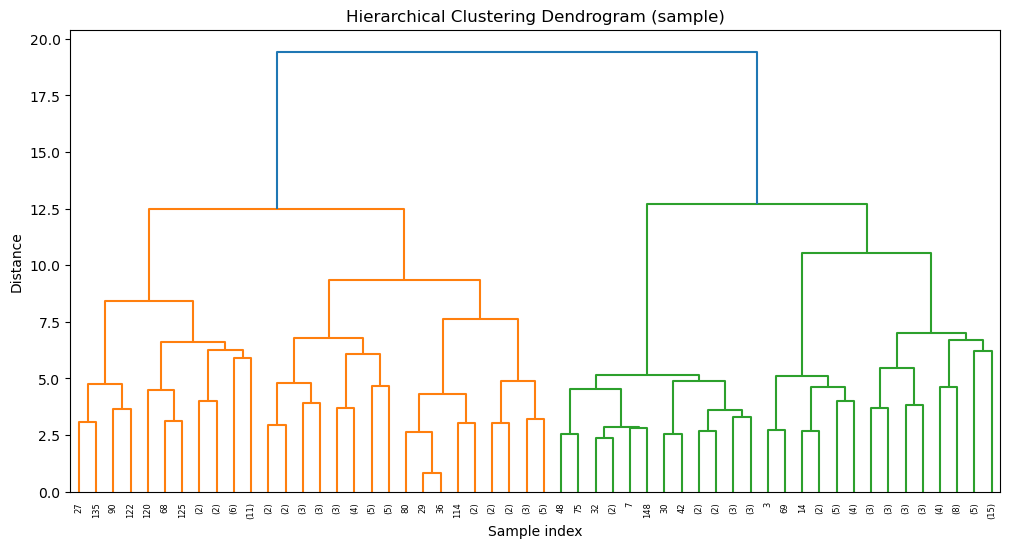

In [5]:
# Reduce sample size for dendrogram (to avoid clutter)
sample_size = 150
X_sample = X_all_trans[:sample_size]

Z = linkage(X_sample, method="ward")

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram (sample)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


In [6]:
with open(r"C:\Users\moham\miniconda3\envs\heart_ml\results\evaluation_metrics.txt", "a") as f:
    f.write("\n--- Unsupervised Learning ---\n")
    f.write(f"KMeans ARI: {adjusted_rand_score(y, labels):.3f}\n")
    f.write(f"KMeans Silhouette: {silhouette_score(X_all_trans, labels):.3f}\n")
